# 機械学習　第６章　実習問題（回帰：線形重回帰１）

## ※ 準備作業
### ⓵ドライブのマウント
### ⓶ディレクトリの作成
### ⓷作成したディレクトリへの移動
### ⓸csvファイル kyusoku.csvのアップロード

In [4]:
ll

total 4
-rw-r--r-- 1 root 351 Dec 15 05:51 kyusoku.csv


### ※ 使用するデータ
### kyusoku.csv

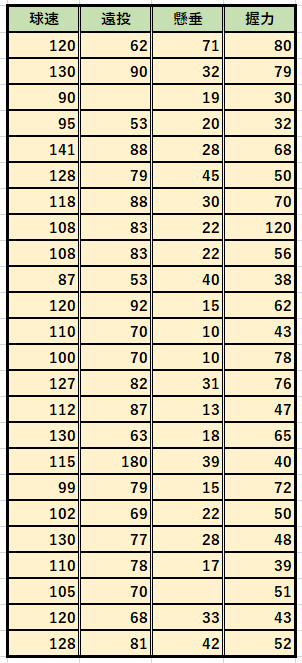

## ※ 実施内容
### 線形重回帰モデルを使用し、遠投、懸垂、握力を特徴量として球速を予測する。

## 問題１
### １．scikit-learnから線形化木モデルの LinearRegressinをインポートしてください。
### ２．model_selectionモジュールからtrain_test_splitをインポートしてください。
### ３．pandasをインポートして別名をpdにしてください。
### ４．ノートブックに画像を表示する命令を記述してください。

In [5]:
# １．LinearRegressionのインポート
# 実装
from sklearn.linear_model import LinearRegression
# ２．train_test_splitをインポート
# 実装
from sklearn.model_selection import train_test_split
# ３．pandasをインポートして別名をpd
# 実装
import pandas as pd
# ４．ノートブックに画像を表示する命令を記述
# 実装
%matplotlib inline

## 問題２
### CSVファイル kyusoku.csv を読み込み先頭の５行を表示してください。

In [8]:
# CSVファイル、kyusoku.csv を読み込む
# 実装
df=pd.read_csv('kyusoku.csv',encoding='shift_jis')
# 先頭の５行を表示
# 実装
df.head(5)

,球速,遠投,懸垂,握力
0,120,62.0,71.0,80
1,130,90.0,32.0,79
2,90,NaN,19.0,30
3,95,53.0,20.0,32
4,141,88.0,28.0,68


### ▶実行結果

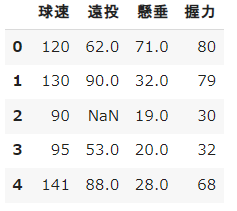

## 問題３
### 問題２で読み込んだCSVファイルの末尾５行を表示してください。


In [9]:
# 読み込んだデータフレームの末尾５行を表示
# 実装
df.tail(5)

,球速,遠投,懸垂,握力
19,130,77.0,28.0,48
20,110,78.0,17.0,39
21,105,70.0,NaN,51
22,120,68.0,33.0,43
23,128,81.0,42.0,52


### ▶実行結果

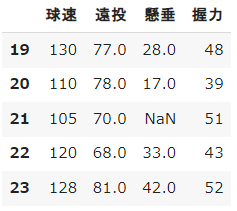

## 問題４
### 読み込んだデータフレームの欠損値を確認してください。

In [10]:
# データフレームの各列の欠損値を表示
# 実装
df.isnull().any(axis=0)

球速    False
遠投     True
懸垂     True
握力    False
dtype: bool

### ▶実行結果

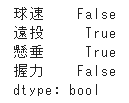

## 問題５
### １．欠損値を平均で補完してください。
### ２．補完が終わったら、穴埋めができたか否かを確認してください。

In [11]:
# 欠損値を平均で補完して、df2に代入
# 実装
df2=df.fillna(df.mean())
# 穴埋めができたか確認
# 実装
df2.isnull().any(axis=0)

球速    False
遠投    False
懸垂    False
握力    False
dtype: bool

### ▶実行結果

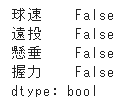

## 問題６
### 正解データと各特徴量の散布図を表示してください。
### 但し、正解データ名、特徴量列名は以下の英語に置き換えてください。
### 正解データ：球速⇒ball_speed
### 特徴量：遠投⇒long_cast
### 特徴量：懸垂⇒pull_ups
### 特徴量：握力⇒grip_strength


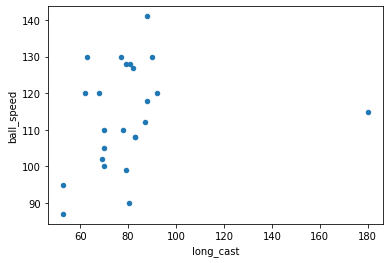

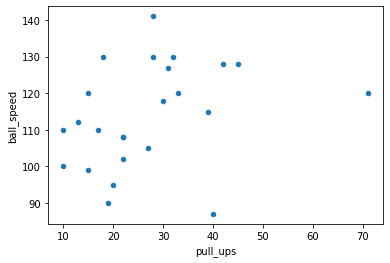

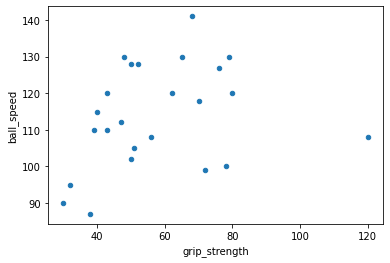

In [18]:
# データフレームの列名を変更
# 実装
df2.columns=['ball_speed','long_cast','pull_ups','grip_strength']
# 球速と遠投、球速と懸垂、球速と握力の散布図を表示
# 実装
%matplotlib inline
df2.plot(kind = 'scatter',x = 'long_cast',y = 'ball_speed')
df2.plot(kind = 'scatter',x = 'pull_ups',y = 'ball_speed')
df2.plot(kind = 'scatter',x = 'grip_strength',y = 'ball_speed')

### ▶実行結果

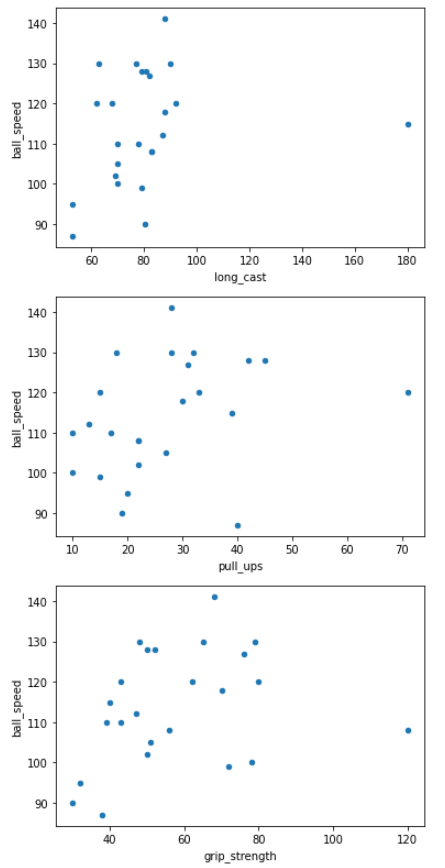

## 問題７
### 問題６で表示した散布図をもとに、外れ値を確認して削除してください。


In [19]:
# 球速と遠投の散布図における外れ値のインデックスをもとめる
# 実装
no=df2[(df2['long_cast'] > 160) & (df2['ball_speed'] < 130)].index
# 削除
# 実装
df3=df2.drop(no,axis=0)
# 球速と懸垂の散布図における外れ値のインデックスをもとめる
# 実装
no=df2[(df2['pull_ups'] > 60) & (df2['ball_speed'] < 130)].index
# 削除
# 実装
df4=df2.drop(no,axis=0)
# 球速と握力の散布図における外れ値のインデックスをもとめる
# 実装
no=df2[(df2['grip_strength'] > 100) & (df2['ball_speed'] < 130)].index
# 削除
# 実装
df5=df2.drop(no,axis=0)

## 問題８
### 外れ値が削除されたかどうかを、散布図を表示して確認してください。

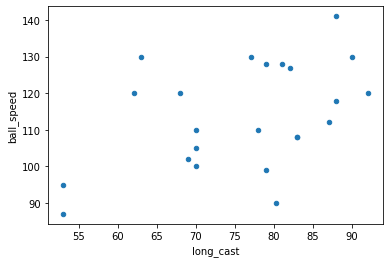

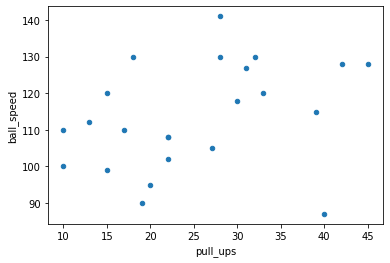

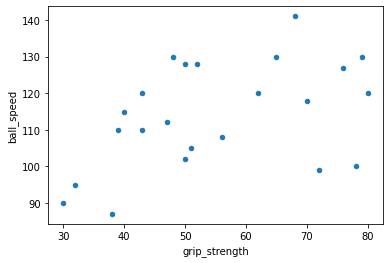

In [20]:
# 球速と遠投、球速と懸垂、球速と握力の散布図を表示
# 実装
df3.plot(kind = 'scatter',x = 'long_cast',y = 'ball_speed')
df4.plot(kind = 'scatter',x = 'pull_ups',y = 'ball_speed')
df5.plot(kind = 'scatter',x = 'grip_strength',y = 'ball_speed')

### ▶実行結果

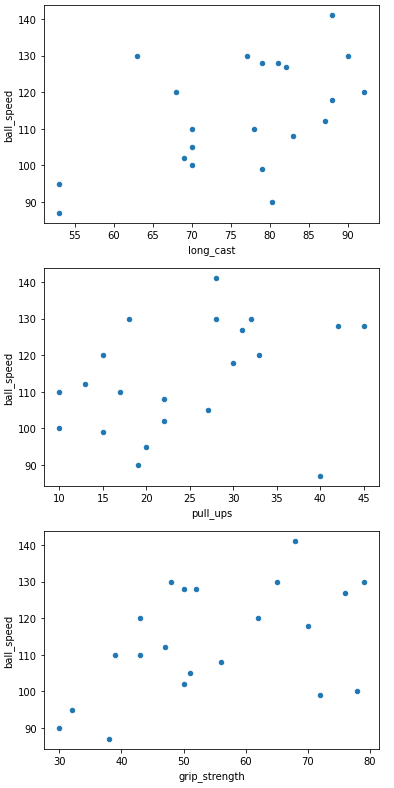

## 問題９
### 外れ値を削除したデータフレームから、特徴量と正解データを取り出してください。

In [21]:
# 特徴量を取り出す
# 実装
col=['long_cast','pull_ups','grip_strength']
x=df3[col]
# 正解データを取り出す
# 実装
t=df3['ball_speed']

## 問題１０
### 問題９で取り出した特徴量と正解データを訓練データとテストデータに分割にしてください。
### ただし、訓練データとテストデータの比率は８：２にしてください。
### また、乱数シードは０に設定します。

In [22]:
# 訓練データとテストデータに分割
# 実装
x_train,x_test,y_train,y_test=train_test_split(x,t,test_size=0.2,random_state=0)

## 問題１１
### 重回帰モデルを作成して、問題１０で分割した訓練データとテストデータを使用して学習させてください。

In [25]:
# 重回帰モデルを作成
# 実装
from sklearn.linear_model import LinearRegression
model=LinearRegression()
# 学習する
# 実装
model.fit(x_train,y_train)

LinearRegression()

## 問題１２
### 問題１１で学習させたモデルを使用して
### 遠投 = 90, 懸垂 = 16, 握力 = 61の人
### 遠投 = 50, 懸垂 = 39, 握力 = 40の人
### の球速を予測してください。

In [30]:
# 予測
# 実装
new=[90,16,61]
new2=[50,39,40]
new_data = [new, new2]
model.predict(new_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([118.72189659,  99.08893208])

### ▶実行結果

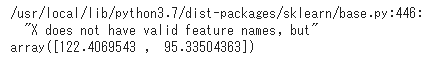

## 問題１３
### 学習したモデルの平均絶対誤差を表示してください。

In [31]:
# mean_absolute_error のインポート
# 実装
from sklearn.metrics import mean_absolute_error
# x_test をしようして予測する
# 実装
pred = model.predict(x_test)
# 平均絶対誤差の計算
# 実装
mean_absolute_error(y_pred=pred,y_true=y_test)

5.257166047022347

### ▶実行結果

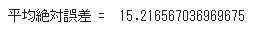

## 問題１４
### モデルを kyusoku.pkl という名前で保存してください。


In [36]:
# pickle をインポート
# 実装
import pickle
# モデルを保存
# 実装
with open('kyusoku.pkl', 'wb') as f:
  pickle.dump(model,f)

### ▶実行結果

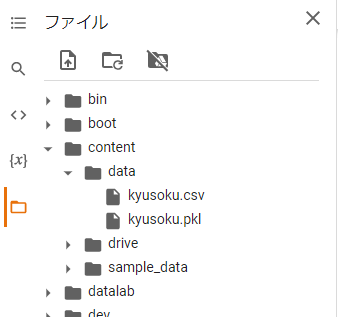

## 問題１５
### 学習したモデルの係数と切片を表示してください。

In [37]:
# 計算式の係数の表示
# 実装
print(model.coef_)
# 計算式の切片の表示
# 実装
print(model.intercept_)

[0.71581502 0.45118648 0.06560252]
43.077807784612844


### ▶実行結果

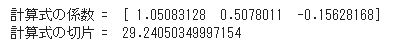

## 問題１６
### 学習したモデルの列と係数を表示してください。

In [38]:
# データフレームの作成
# 実装
tmp=pd.DataFrame(model.coef_)
# 列名をインデックスに指定
# 実装
tmp.index = x_train.columns
# 表示
# 実装
tmp

,0
long_cast,0.715815
pull_ups,0.451186
grip_strength,0.065603


### ▶実行結果

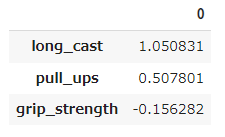